#### Урок 6. Взаимосвязь величин. Параметрические и непараметрические показатели корреляции. Корреляционный анализ.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats


Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

1. Найдите ковариацию этих двух величин: сначала без использования специальных функций, а затем с помощью функции numpy.cov. Полученные значения должны быть равны.
2. Найдите коэффициент корреляции Пирсона: с помощью ковариации и средних квадратических отклонений двух признаков, а затем с помощью специальных функций из библиотек numpy и pandas.

In [27]:
salary = pd.Series([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = pd.Series([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
df = pd.DataFrame({"salary" :salary, "scoring": scoring})

In [42]:
df = pd.DataFrame({"salary" :salary, "scoring": scoring})
df

,salary,scoring
0,35,401
1,45,574
2,190,874
3,200,919
4,40,459
5,70,739
6,54,653
7,150,902
8,120,746
9,110,832


$$\operatorname{cov}(X, Y) = M(XY) - M(X) M(Y).$$

In [53]:
X = df['salary']
Y = df['scoring']

MX = X.mean()
MY = Y.mean()

cov = ((X - MX) * (Y - MY)).mean()
print("ковариация = ",cov)

ковариация =  9157.84


In [54]:
cov = (X * Y).mean() - MX * MY
print("ковариация = ",cov)

ковариация =  9157.839999999997


In [55]:
cov = ((X - MX) * (Y - MY)).sum() / (X.shape[0] - 1)
print("1.1 Ответ: несмещенная ковариация = ",cov)

Ответ: несмещенная ковариация =  10175.37777777778


In [56]:
# Дисперсии
X.var(), Y.var()

(3882.9333333333334, 33854.32222222223)

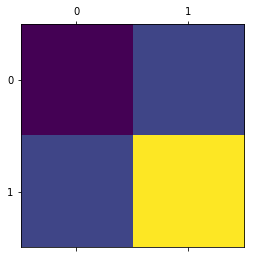

               salary       scoring
salary    3882.933333  10175.377778
scoring  10175.377778  33854.322222


In [40]:
cov = df.cov()
plt.matshow(cov)
plt.show()
print(cov)

In [41]:
#cov = np.cov(df)
df.cov()

,salary,scoring
salary,3882.933333,10175.377778
scoring,10175.377778,33854.322222


__коэффициент корреляции Пирсона__:
$$r_{XY} = \dfrac{\operatorname{cov}(X, Y)}{\sigma_X \cdot \sigma_Y}.$$



In [59]:
corr = cov / (X.std() * Y.std())
print("1.2 Ответ: корелляция Пирсона = ",corr)


1.2 Ответ: корелляция Пирсона =  0.8874900920739164


In [58]:
df[['salary', 'scoring']].corr()

,salary,scoring
salary,1.00000,0.88749
scoring,0.88749,1.00000


Задача 2

Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:

131, 125, 115, 122, 131, 115, 107, 99, 125, 111

Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [162]:
iq  = pd.Series([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])

In [163]:
n = iq.count()
mx = iq.mean() 
sigma = iq.std()
print("2 сигма: от", iq.mean()- iq.std()*2, "до", iq.mean()+ iq.std()*2 )

2 сигма: от 97.00866423280772 до 139.19133576719227


In [164]:
t = 1.95

In [165]:
dx = (mx - t * sigma / np.sqrt(n), mx + t * sigma / np.sqrt(n))
print("Ответ: доверительный интервал", dx)

Ответ: доверительный интервал (111.59707565782901, 124.60292434217098)


In [166]:
iq.mean() 

118.1

In [167]:
sigma

10.54566788359614

Задача 3
Известно, что рост футболистов в сборной распределён нормально с известной дисперсией 25. На выборке объёма 27 выборочное среднее составило 174.2. Найдите доверительный интервал для математического ожидания с надёжностью 0.95.

In [168]:
dx = 25
sigma = np.sqrt(dx)
n = 27
mx = 174.2
p = 0.95

In [169]:
alpha = 0.05

t = stats.t.ppf(1 - alpha / 2, df=n - 1)
t

2.055529438642871

In [170]:
stats.t.pdf(p, df = n-1 )

0.24927271377413387

In [171]:
# Не до конца разобрался с надёжностью/уровнем значимости
t = stats.t.pdf(p, df = n - 1) # как получать его из функции?

t = 1.96

In [172]:
dx = (mx - t * sigma / np.sqrt(n), mx + t * sigma / np.sqrt(n))

In [173]:
print("Ответ: доверительный интервал -",dx)

Ответ: доверительный интервал - (172.31398912064722, 176.08601087935276)


Задача 4

Выберите тему для проектной работы по курсу Теории вероятностей и математической статистики и напишите ее в комментарии к Практическому заданию.

In [72]:
# in progress
# сейчас в отпуске, к следующей неделе подберу практический кейс для курсовой работы

Не до конца разобрался с надёжностью/уровнем значимости.
Поясните, плз, как его получать функцией и про его связь с персентилем/сигмой.
Спасибо!

Тему для проекта подберу позже.